In [1]:
from random import seed
from random import random
import numpy as np 

class Automatos:
    def __init__(self):
        self.A = []
        self.r = random()

    def stochastic_matrix(self): 
        k = 2
        for i in range(k): 
            linha = []
            for j in range(k):
                linha.append(0)
            self.A.append(linha)
            
        for i in range(k): #Adiciona o primeiro elemento de todas as colunas com um aleatorio
            self.A[0][i] = random()
        
        self.A[1][0] = 1 - self.A[0][0]
        self.A[1][1] = 1 - self.A[0][1]       
                
        A_array = np.array(self.A)
        #A_transpose = A_array.transpose()
        #return A_transpose
        return A_array

    def deterministic_automata(self, i):
        p = np.array([])
        A_transpose = self.stochastic_matrix().transpose()
        r = random()
        
        if i == 1:
            p = A_transpose[1]
            l = p[i]
            while r > l:
                i -= 1
                l += p[i]
        elif i == 0:
            p = A_transpose[0]
            l = p[i]
            while r > l:
                i += 1
                l += p[i]
        return i
    
joao = Automatos()
pedro = Automatos()
carlos = Automatos()
#print(pedro.stochastic_matrix())
#print(joao.stochastic_matrix())
#print(carlos.stochastic_matrix())
inter = 200
h = []
pedro_ = []
carlos_ = []
for i in range(inter):
    h.append(joao.deterministic_automata(1))
    pedro_.append(pedro.deterministic_automata(1))
    carlos_.append(carlos.deterministic_automata(1))

hl = np.append(h,1)
pedro_padroes = np.append(pedro_,1)
carlos_padroes = np.append(carlos_,1)

#print(hl)
#print(pedro_padroes)
#print(carlos_padroes)

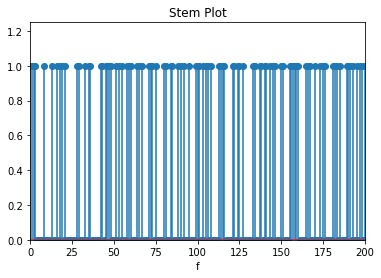

In [12]:
import matplotlib.pyplot as plt
from scipy import signal
import pylab

marks = np.arange(inter + 1)


pylab.xlim([0,inter])
pylab.ylim([0,1.25])

#fig, (x1, x2, x3) = plt.subplots(1, 3)

x1 = plt.stem(marks, hl)
#x2 = plt.stem(marks, pedro_padroes, '-.')
#x3 = plt.stem(marks, carlos_padroes, '-.')


plt.title('Stem Plot')
plt.xlabel('f')

plt.show()

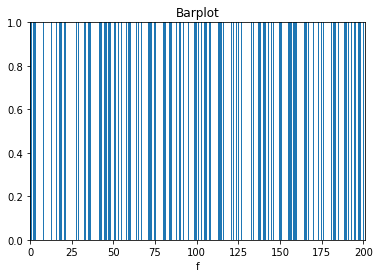

In [3]:
x = np.arange(inter+1)
plt.bar(x, hl)
#plt.bar(x, carlos_padroes)
#plt.bar(x,pedro_padroes)

plt.title('Barplot')
plt.xlabel('f')
pylab.xlim(0,inter+1)
pylab.ylim(0,1)

plt.show()

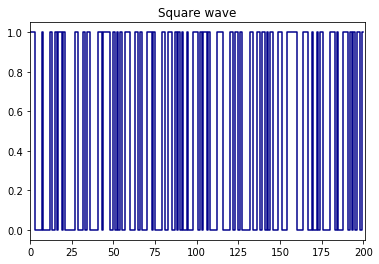

In [13]:
from numpy import arange

plt.title("Square wave")
plt.step(arange(0,len(hl)),hl, color = 'darkblue')
#plt.step(arange(0,len(carlos_padroes)),carlos_padroes, color = 'darkblue')
#plt.step(arange(0,len(pedro_padroes)),pedro_padroes, color = 'darkblue')
plt.xlim(0,len(hl))

plt.show()

In [5]:
import math

media = np.mean(hl)
desvio = np.std(hl)

#def probability_density(x):
 #   pdf = (1/(desvio*math.sqrt(2*math.pi)))*math.exp((-1/2)*((x-media)/desvio)**2)
  #  return pdf

k = []
p = []
for i in range(len(hl)):
    pdf = (1/(desvio*math.sqrt(2*math.pi)))*math.exp((-1/2)*((hl[i]-media)/desvio)**2)
    k.append(pdf)
    p.append(i)
    
#plt.plot(k)


#for i in range(inter + 1):
    #k.append(probability_density(hl[i]))
    #p.append(i)
    #plt.plot(i,probability_density(hl[i]))
#print(k)
#plt.plot(k,probability_density())
#plt.xlim(0,1)
#plt.show()

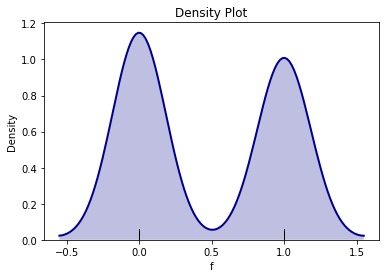

In [6]:
import seaborn as sns

sns.distplot(hl, hist = False, kde = True, rug = True,
             color = 'darkblue', 
             kde_kws={'shade': True, 'linewidth':2},
             rug_kws={'color': 'black'})
#sns.distplot(hl, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])
plt.title('Density Plot')
plt.xlabel('f')
plt.ylabel('Density')
plt.show()

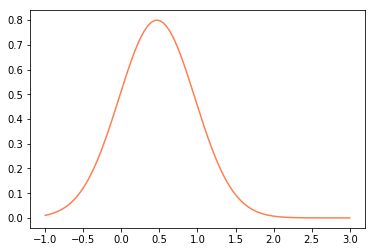

In [7]:
import scipy.stats

x_min = -1
x_max = 3

media = np.mean(hl)
std = np.std(hl)

x = np.linspace(x_min, x_max, 1000)
y = scipy.stats.norm.pdf(x,media,std)

plt.plot(x,y, color='coral')
plt.show()

In [8]:
contador = 0
for i in range(len(hl)):
    if hl[i] == 1:
        contador += 1
media_um = contador/len(hl)


[94, 107]
[1, 0]


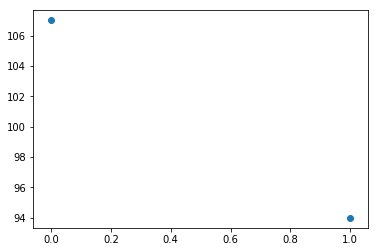

In [9]:
elem = []
number =[]
for i in range(len(hl)):
    if hl[i] not in elem:
        elem.append(hl[i])
    else:
        continue
for i in range(len(elem)):
    c = 0
    for k in range(len(hl)):
        if elem[i] == hl[k]:
            c += 1
        else:
            continue
    number.append(c)

print(number)
print(elem)

plt.scatter(elem,number)
plt.show()

In [10]:
relative_frequency = []
contador = 0
for i in range(len(hl)):
    if hl[i] == 1:
        relative_frequency.append(1/len(hl))
        contador += 1
    else:
        relative_frequency.append(0)
#print(contador)
#print(relative_frequency)

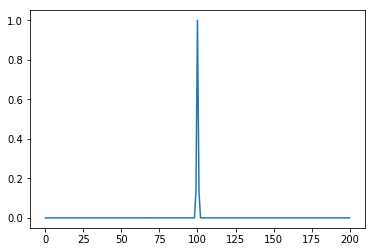

In [11]:
from scipy import signal 
k = np.std(hl)
window = signal.gaussian(len(hl), std = k)
#print(window)
plt.plot(window)